In [1]:
    import numpy as np 
import pandas as pd

In [2]:
file = './spam.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [3]:
df = pd.read_csv(file,encoding ='Windows-1252')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

##DATA CLEANING

In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [7]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df = df.rename(columns ={'v1' : 'target' , 'v2' : 'text'})

In [11]:
from sklearn.preprocessing import LabelEncoder 

In [12]:
encoder = LabelEncoder()

In [13]:
 df['target'] = encoder.fit_transform(df['target'])

In [14]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

EDA

In [19]:
import matplotlib.pyplot as plt

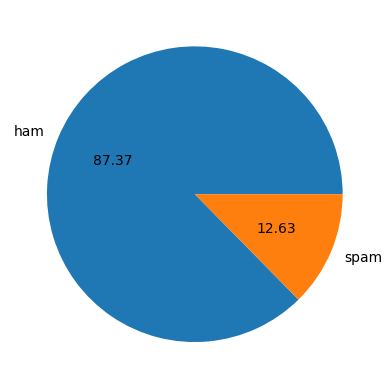

In [20]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#we know that there is an imbalance in the data 


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rohanr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_char'] =  df['text'].apply(len)

In [25]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

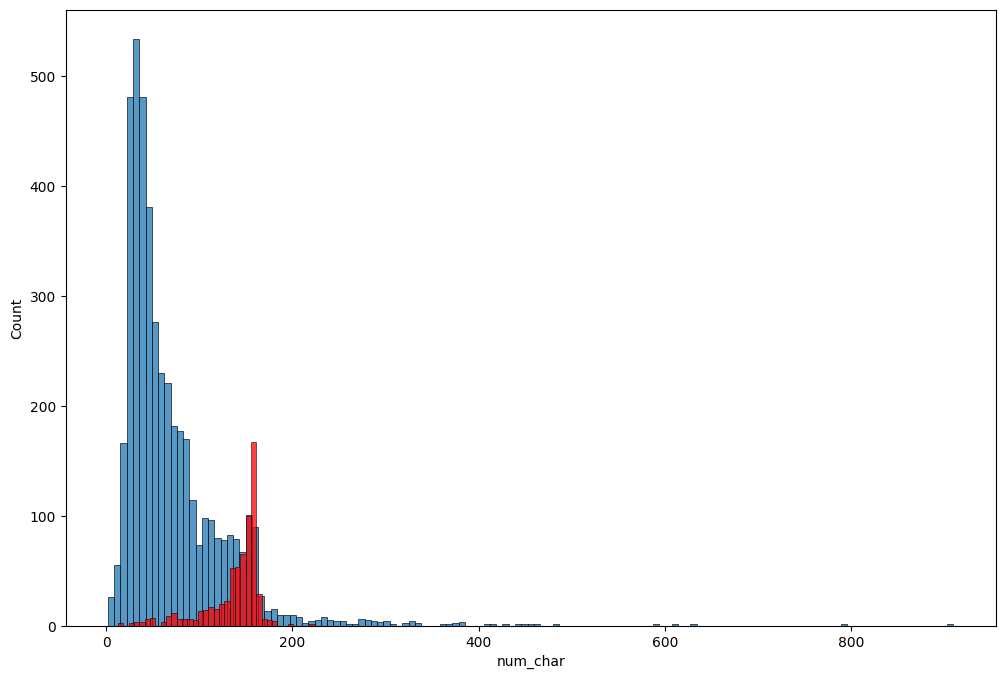

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

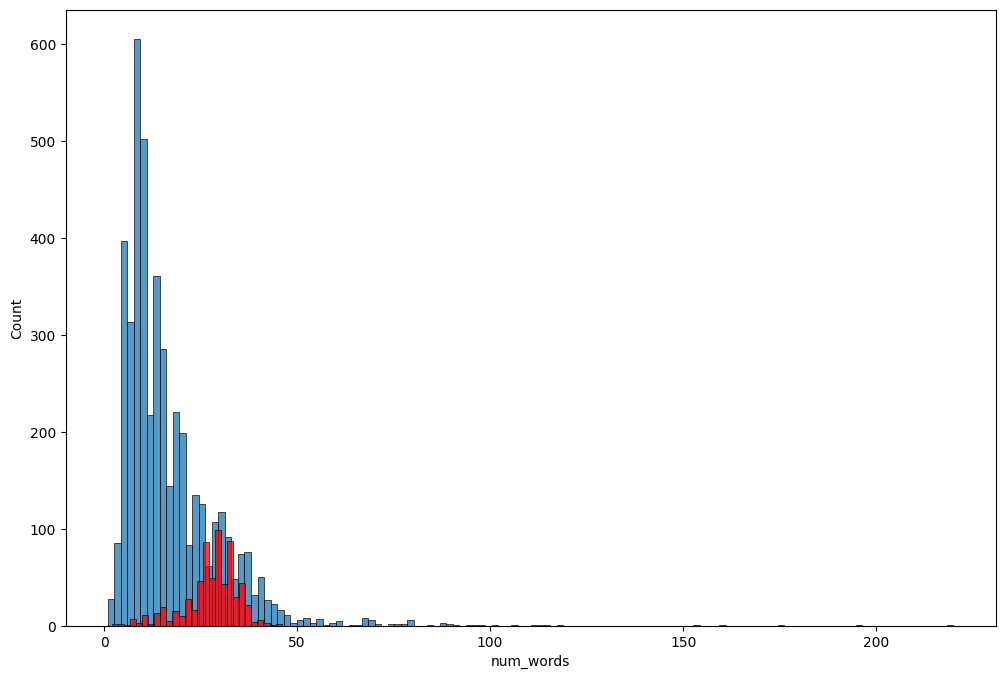

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

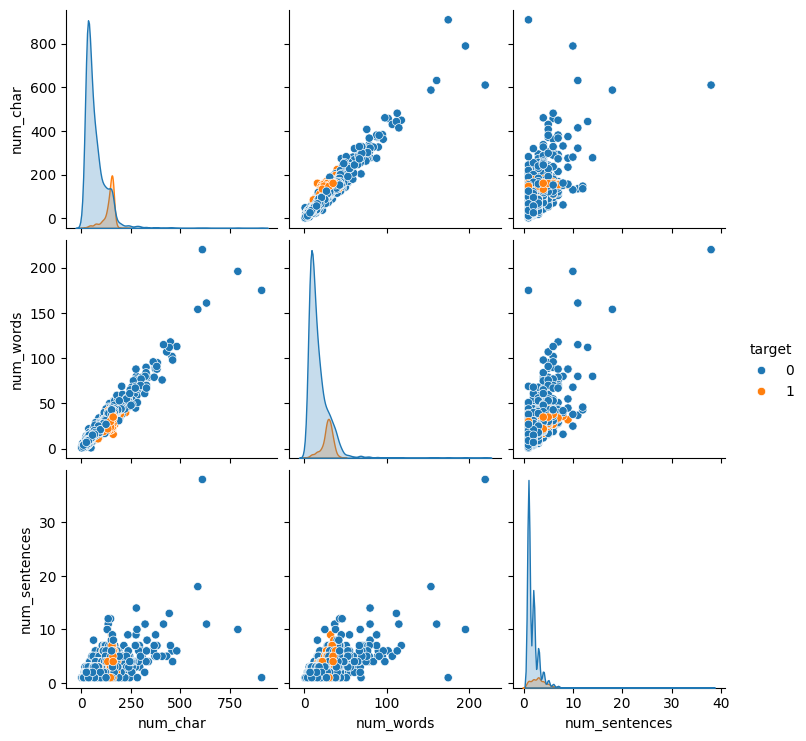

In [30]:
sns.pairplot(df,hue = 'target')

<Axes: >

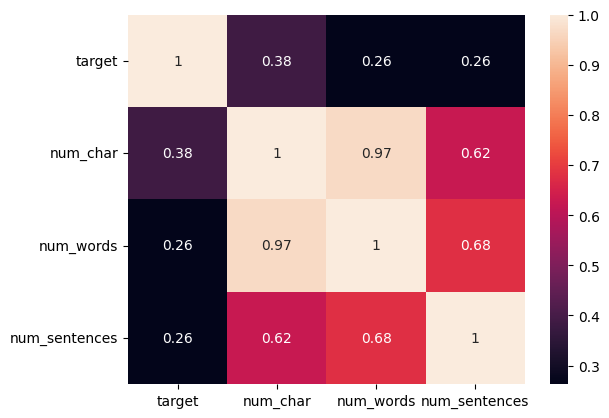

In [31]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

DATA PREPROCESSING

In [32]:
from nltk.corpus import stopwords 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/rohanr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import string

In [121]:
def transform_text1(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text :
        if(i.isalnum()):
            y.append(i)
    text = y[:]
    print(text)
    y.clear()
    

    for i in text:
        x = ps.stem(i)
        y.append(x)
    return y

In [128]:
def transform_text(text):
    text = transform_text1(text)
    y = []
    for i in text:
            if(i not in stopwords.words('english') and i not in string.punctuation):
               y.append(i)
    return y


In [129]:
transform_text("this is a $")

['this', 'is', 'a']


['thi']

In [122]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Running')

'run'

In [131]:
df['transformed_text'
] = df['text'].apply(transform_text)
df.head()

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'do', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'i', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent']
['as', 'per', 'your', 'reques

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [132]:
df

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[thi, 2nd, time, tri, 2, contact, u, pound, pr..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, wa, mood, ani, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[guy, bitch, act, like, interest, buy, someth,..."


In [58]:
#word cloud - shows the most important words in the ham and spam catergory

In [59]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.1/473.1 kB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [89]:
from wordcloud import WordCloud
wc= WordCloud(width = 500 , height = 500 , min_font_size = 10,background_color = 'white')

In [133]:
filtered_series_spam = df[df['target'] == 1]['transformed_text']

# Convert the elements to strings and concatenate


In [134]:
spam_wc = wc.generate(filtered_series_spam.astype(str).str.cat(sep = " "))

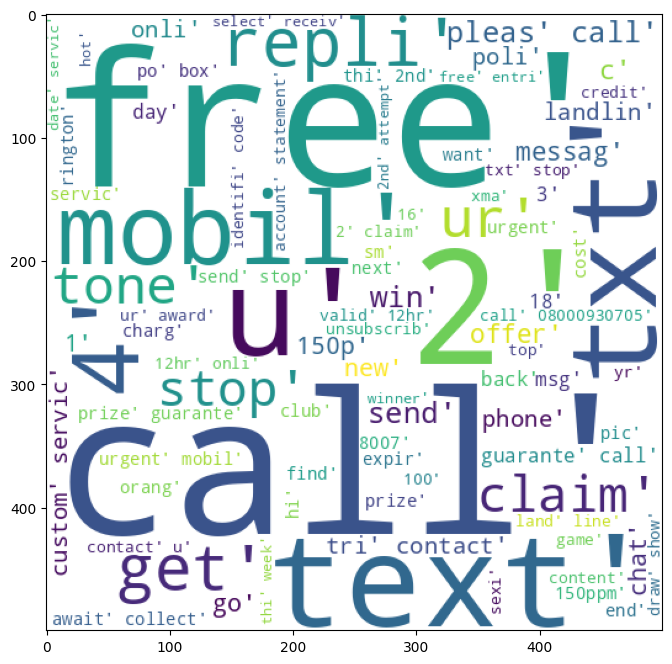

In [135]:
plt.figure(figsize = (16,8))
plt.imshow(spam_wc)

In [136]:
filtered_series_ham = df[df['target'] == 0]['transformed_text']


In [137]:
ham_wc = wc.generate(filtered_series_ham.astype(str).str.cat(sep = " "))

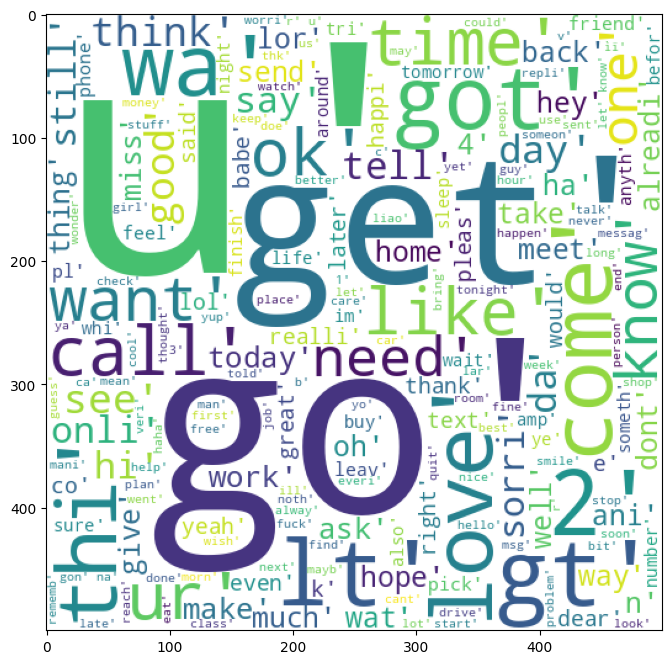

In [138]:
plt.figure(figsize = (16,8))
plt.imshow(ham_wc)

In [146]:
spam_corpus = []
for i in df[df['target'] == 1]['transformed_text'].tolist():
    for word in i:
        spam_corpus.append(word)

In [147]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 

In [148]:
len(spam_corpus)

10161

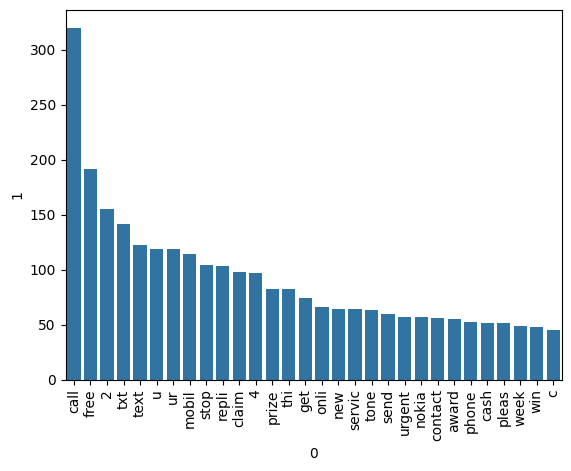

In [166]:
from collections import Counter

sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [161]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     320
1     191
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     97
12     82
13     82
14     74
15     66
16     64
17     64
18     63
19     60
20     57
21     57
22     56
23     55
24     52
25     51
26     51
27     49
28     48
29     45
Name: 1, dtype: int64

In [170]:
ham_corpus = []
for i in df[df['target'] == 0]['transformed_text'].tolist():
    for word in i:
        ham_corpus.append(word)

In [171]:
len(ham_corpus)

36420

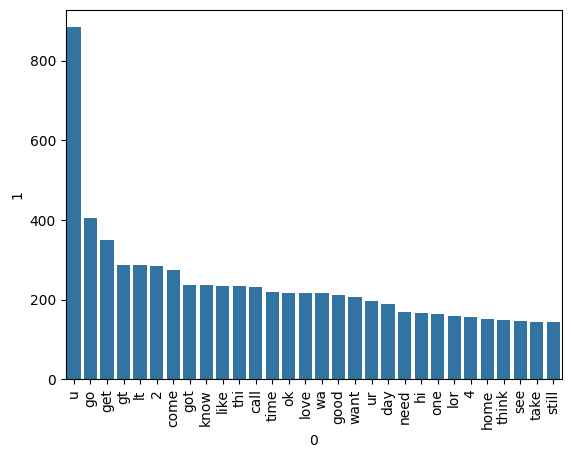

In [172]:
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [173]:
#MODEL BUILDING 

In [203]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [257]:
list_of_strings = [' '.join(inner_list) for inner_list in df['transformed_text']]

tfid = TfidfVectorizer(max_features = 3000)
X = tfid.fit_transform(list_of_strings).toarray()


In [258]:
X.shape

(5169, 3000)

In [259]:
y = df['target'].values

In [260]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [263]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [264]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [265]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [266]:
gnb.fit(X_train,y_train)
ypred_1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred_1))
print(confusion_matrix(y_test,ypred_1))
print(precision_score(y_test,ypred_1))


0.8713733075435203
[[790 106]
 [ 27 111]]
0.511520737327189


In [267]:
mnb.fit(X_train,y_train)
ypred_2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred_2))
print(confusion_matrix(y_test,ypred_2))
print(precision_score(y_test,ypred_2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [268]:
bnb.fit(X_train,y_train)
ypred_3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred_3))
print(confusion_matrix(y_test,ypred_3))
print(precision_score(y_test,ypred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [269]:
#mnb with tfidf has the highest precision thus we will use it 

In [270]:
import pickle

In [273]:
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))